In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Step 1: Upload the unemployment dataset

In this step, we will upload the unemployment data file to our Google Colab environment using `files.upload()` method.


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


# 🔹 Step 2: Load the dataset using Pandas

We will now read the uploaded CSV file into a Pandas DataFrame and view the first few rows.


In [8]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [9]:
import os    #its  shows thst the exact name of file
print(os.listdir())


['.config', 'Unemployment_Rate_upto_11_2020.csv', 'sample_data']


In [10]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# 🔹 Step 3: Check and clean column names

Sometimes columns may have extra spaces. Let's clean them and rename a few for easier use.


In [14]:
df.columns  # dekho columns ka actual naam kya hai


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [15]:
# Rename for easy access
df.rename(columns={
    'Region': 'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Participation_Rate',
    'Estimated Labour Force': 'Labour_Force'
}, inplace=True)


# 🔹 Step 4: Convert the 'Date' column into datetime format

This will help us in plotting time-based graphs later.


In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


KeyError: 'Date'

In [17]:
print(df.columns.tolist())


['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [18]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()


In [19]:
print(df.columns.tolist())


['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


In [20]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [21]:
# Step 1: Check column names
print(df.columns.tolist())

# Step 2: Strip unwanted spaces
df.columns = df.columns.str.strip()

# Step 3: Confirm cleaned names
print(df.columns.tolist())  # check if 'Date' exists now

# Step 4: Convert Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']
['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


# 🔹 Step 5: Calculate average unemployment rate for each state

We will use groupby to find the mean unemployment rate for every state in the dataset.


In [22]:
# Group by State and get average unemployment rate
state_avg = df.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
state_avg

KeyError: 'Column not found: Unemployment_Rate'

In [23]:
# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Rename columns
df.rename(columns={
    'Region': 'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)

# Step 3: Group by and calculate average
state_avg = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)
state_avg


,Unemployment_Rate
State,
Haryana,27.477000
Tripura,25.055000
Jharkhand,19.539000
Bihar,19.471000
Delhi,18.414000
Puducherry,17.942000
Jammu & Kashmir,16.477778
Himachal Pradesh,16.065000
Rajasthan,15.868000


# 🔹 Step 6: Plot bar chart of state-wise average unemployment

This bar plot shows which states had higher unemployment on average.


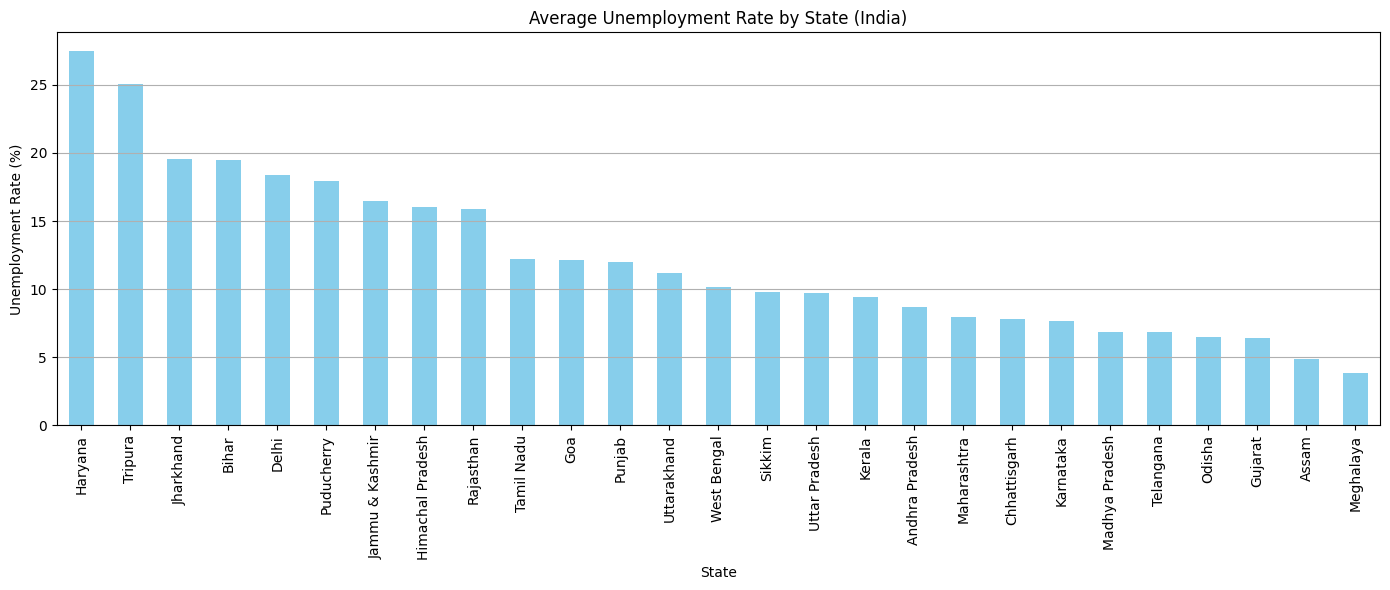

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
state_avg.plot(kind='bar', color='skyblue')
plt.title("Average Unemployment Rate by State (India)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 🔹 Step 7: Analyze COVID-19 impact using time-series lineplot

We’ll visualize unemployment trends in 2020 to see how COVID affected different states.


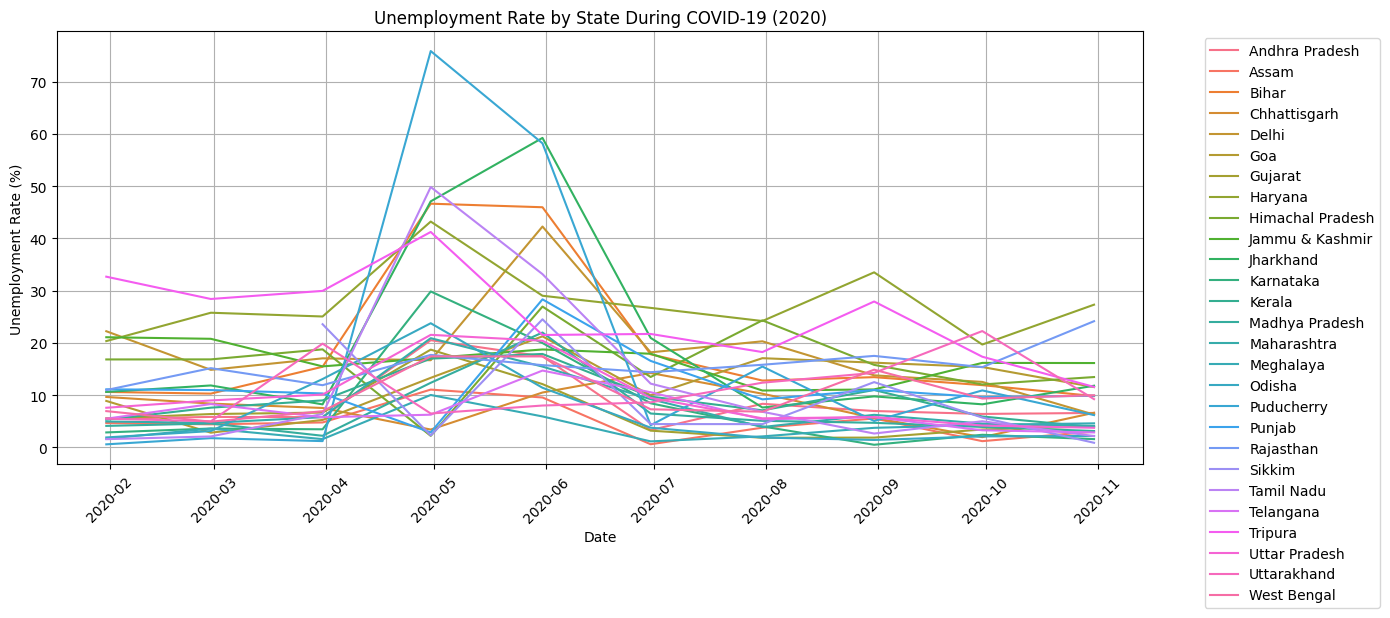

In [25]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=df[df['Date'] >= "2020-01-01"], x='Date', y='Unemployment_Rate', hue='State')
plt.title("Unemployment Rate by State During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


# 🔹 Step 8: Heatmap of unemployment rates over time for each state

This heatmap provides a visual representation of changes in unemployment across months and states.


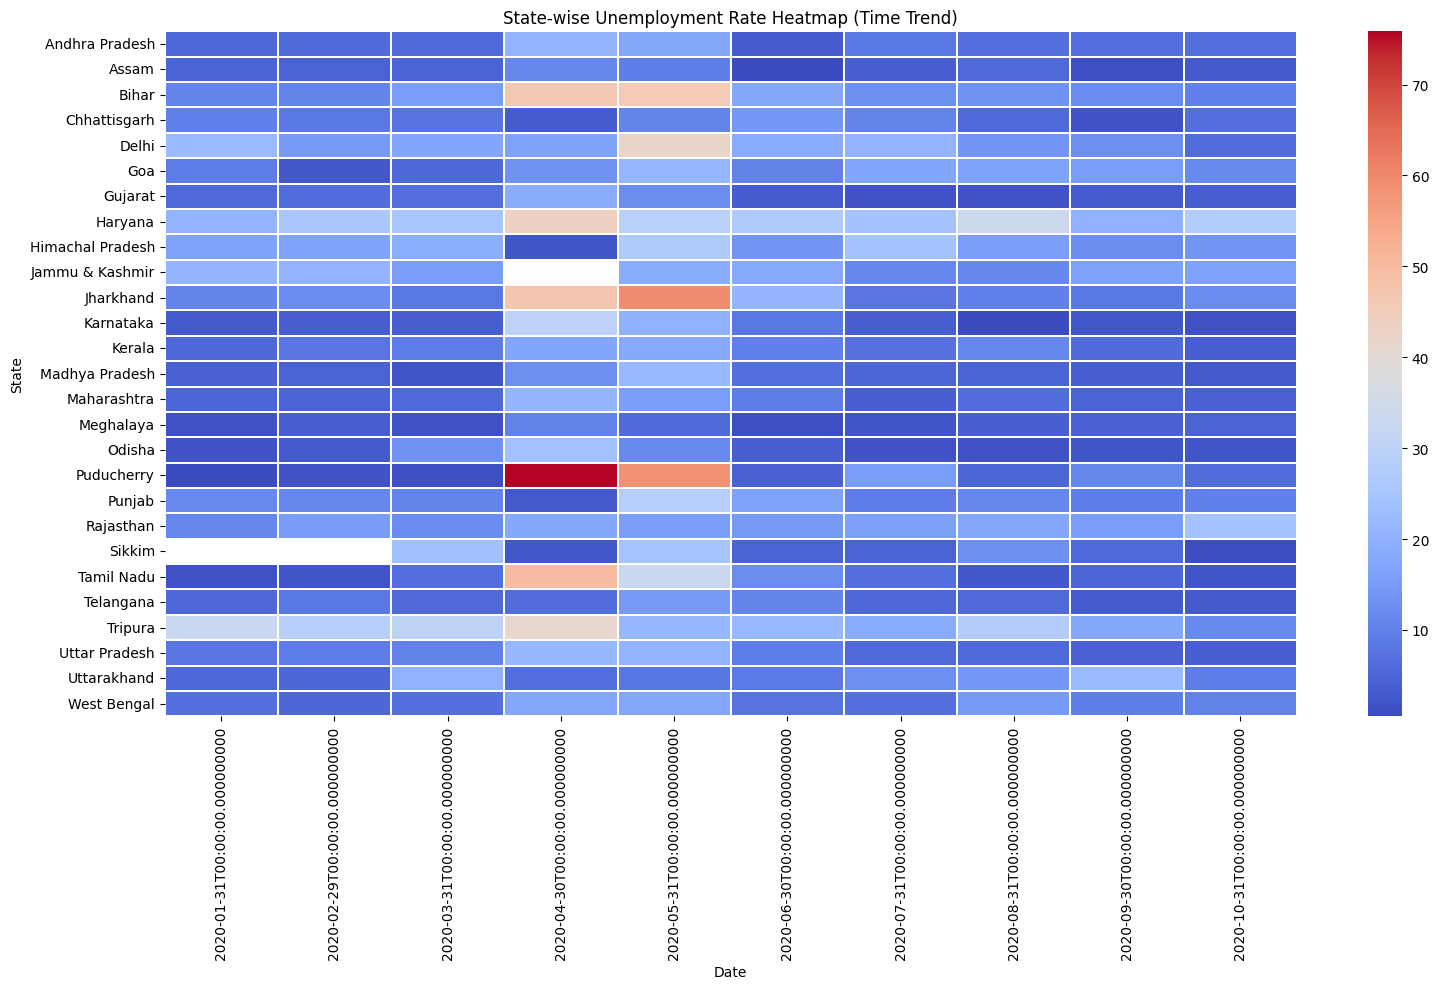

In [26]:
heatmap_data = df.pivot_table(values='Unemployment_Rate', index='State', columns='Date')

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.1, linecolor='white')
plt.title("State-wise Unemployment Rate Heatmap (Time Trend)")
plt.xlabel("Date")
plt.ylabel("State")
plt.tight_layout()
plt.show()


# 📊 Insights Summary:

- Haryana and Jharkhand had the highest average unemployment rates.
- April-May 2020 saw a sharp rise in unemployment due to COVID lockdown.
- Chhattisgarh and Meghalaya were among the more stable states.
- Trends reveal significant regional differences in unemployment.
- These patterns can help guide employment and economic policy decisions.
